In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
data=pd.read_csv("TrafficTwoMonth.csv")
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [4]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [5]:
# Check the column names to ensure correctness
data.columns


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [6]:
# Encode categorical variables
label_encoder=LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])


In [7]:
# Display basic statistics
data_description = data.describe()
data_description

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,3.193548,65.440692,12.161458,12.912970,18.646337,109.161458,2.162130
std,8.945023,2.006921,44.749335,11.537944,12.497736,10.973139,55.996312,1.186134
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,8.000000,1.000000,18.750000,3.000000,2.000000,10.000000,54.000000,1.000000
50%,16.000000,3.000000,62.000000,9.000000,10.000000,18.000000,104.000000,3.000000
75%,24.000000,5.000000,103.000000,19.000000,20.000000,27.000000,153.000000,3.000000
max,31.000000,6.000000,180.000000,70.000000,50.000000,60.000000,279.000000,3.000000


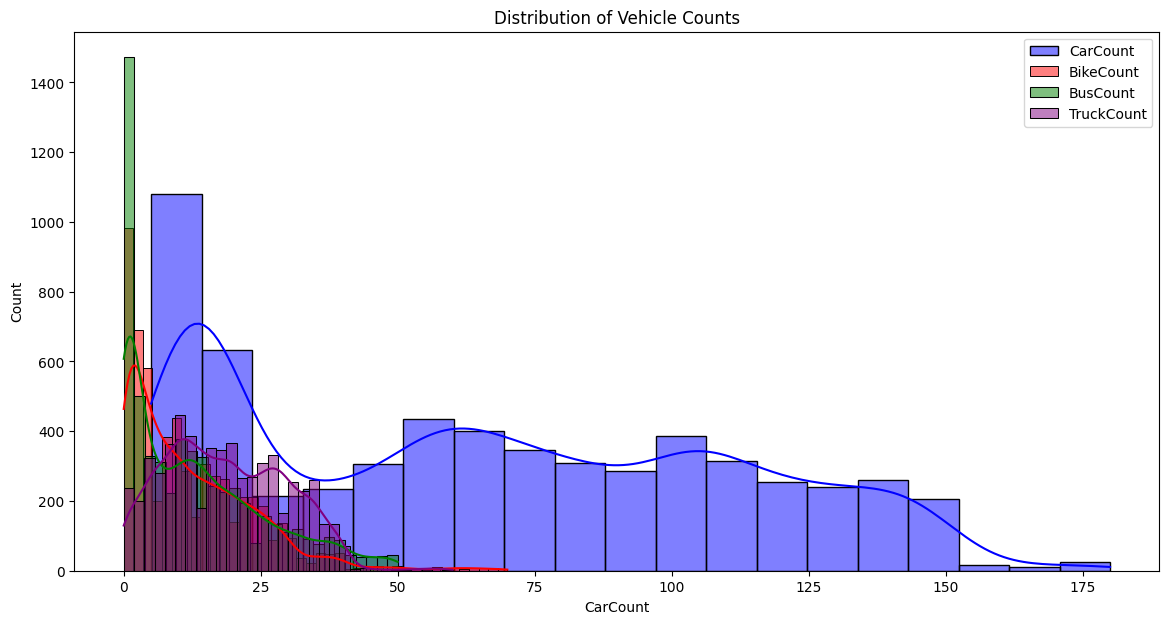

In [8]:
# Data Distribution Plots
plt.figure(figsize=(14, 7))
sns.histplot(data['CarCount'], kde=True, label='CarCount', color='blue')
sns.histplot(data['BikeCount'], kde=True, label='BikeCount', color='red')
sns.histplot(data['BusCount'], kde=True, label='BusCount', color='green')
sns.histplot(data['TruckCount'], kde=True, label='TruckCount', color='purple')
plt.legend()
plt.title('Distribution of Vehicle Counts')
plt.show()

In [9]:
data_corr=data[['Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation']]
data_corr

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,5,13,2,2,24,41,3
1,5,14,1,1,36,52,3
2,5,10,2,2,32,46,3
3,5,10,2,2,36,50,3
4,5,11,2,1,34,48,3
...,...,...,...,...,...,...,...
5947,4,16,3,1,36,56,3
5948,4,11,0,1,30,42,3
5949,4,15,4,1,25,45,3
5950,4,16,5,0,27,48,3


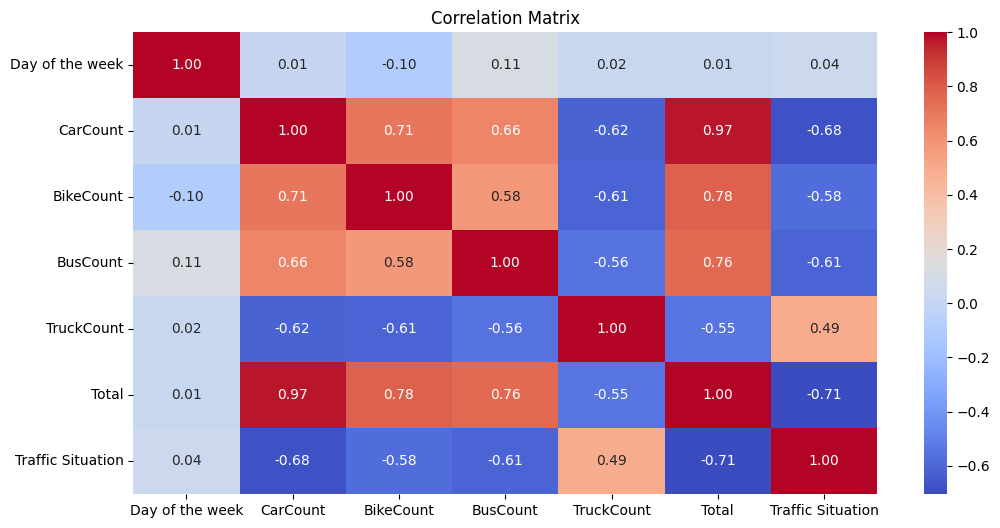

In [10]:
# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

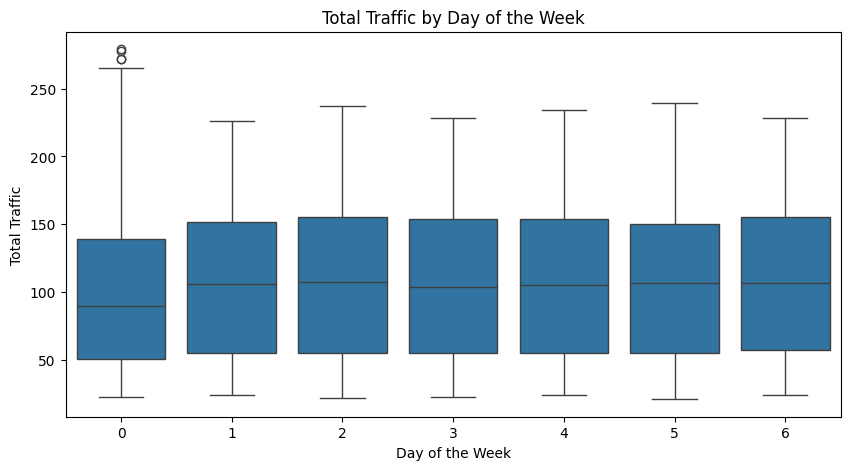

In [11]:
# Day of the Week Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='Day of the week', y='Total', data=data)
plt.title('Total Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Traffic')
plt.show()


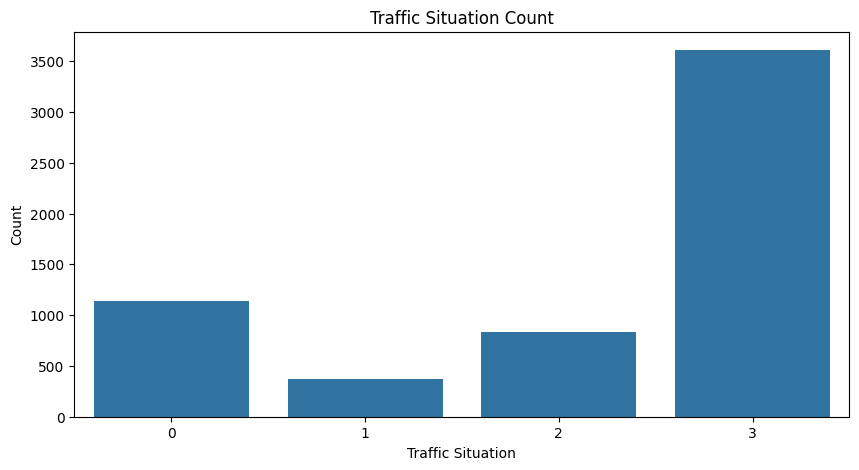

In [12]:
# Traffic Situation Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Traffic Situation', data=data)
plt.title('Traffic Situation Count')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('TrafficTwoMonth.csv')


In [14]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [15]:
data["Traffic Situation"].value_counts()

Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64

In [16]:
data.drop(["Date","Total"],axis=1,inplace=True)

In [17]:

# Convert Date and Time to datetime
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.time

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])

# Display basic statistics
data.describe()

# Display first few rows
data.head()


,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation
0,00:00:00,5,13,2,2,24,3
1,00:15:00,5,14,1,1,36,3
2,00:30:00,5,10,2,2,32,3
3,00:45:00,5,10,2,2,36,3
4,01:00:00,5,11,2,1,34,3


In [18]:
# Convert Time to seconds since midnight
data['Time'] = data['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [19]:
data.dtypes

Time                 int64
Day of the week      int32
CarCount             int64
BikeCount            int64
BusCount             int64
TruckCount           int64
Traffic Situation    int32
dtype: object

In [20]:
# Drop any remaining non-numeric columns if any
data = data.select_dtypes(include=[np.number])


In [21]:
data

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation
0,0,5,13,2,2,24,3
1,900,5,14,1,1,36,3
2,1800,5,10,2,2,32,3
3,2700,5,10,2,2,36,3
4,3600,5,11,2,1,34,3
...,...,...,...,...,...,...,...
5947,81900,4,16,3,1,36,3
5948,82800,4,11,0,1,30,3
5949,83700,4,15,4,1,25,3
5950,84600,4,16,5,0,27,3


In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler
import pandas as pd

# Define features and target variable
X = data.drop(['Traffic Situation'], axis=1)
y = data['Traffic Situation']
feature_names = X.columns.tolist() 
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize the resampled features
scaler = StandardScaler()  # or MinMaxScaler()
X_resampled_normalized = scaler.fit_transform(X_resampled)

# Split the balanced and normalized dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_normalized, y_resampled, test_size=0.2, random_state=42)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
print("Normalized resampled dataset shape:", X_resampled_normalized.shape)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Original dataset shape: (5952, 6) (5952,)
Resampled dataset shape: (14440, 6) (14440,)
Normalized resampled dataset shape: (14440, 6)
Training set shape: (11552, 6) (11552,)
Testing set shape: (2888, 6) (2888,)


In [23]:
X_train

array([[-0.68232791,  1.12251591,  1.67114085, -0.34513196,  1.0583521 ,
        -1.19744698],
       [-0.7601685 ,  0.58674775,  0.22632884,  1.14053262,  0.37817467,
        -0.29619582],
       [-1.30505268,  1.12251591,  0.2026434 , -0.60730807, -1.20890599,
        -0.2060707 ],
       ...,
       [-1.38289328, -0.48478855, -1.33691038, -0.78209213, -1.13333072,
         1.95693209],
       [ 1.65288999,  1.65828406, -1.62113569, -1.21905231, -1.05775545,
         1.68655674],
       [ 0.17391866,  0.58674775,  0.77109402,  0.61618041,  1.51180372,
        -0.2060707 ]])

Decision Tree Accuracy: 0.9709141274238227
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       735
           1       0.96      0.98      0.97       741
           2       0.99      0.99      0.99       715
           3       0.97      0.94      0.95       697

    accuracy                           0.97      2888
   macro avg       0.97      0.97      0.97      2888
weighted avg       0.97      0.97      0.97      2888



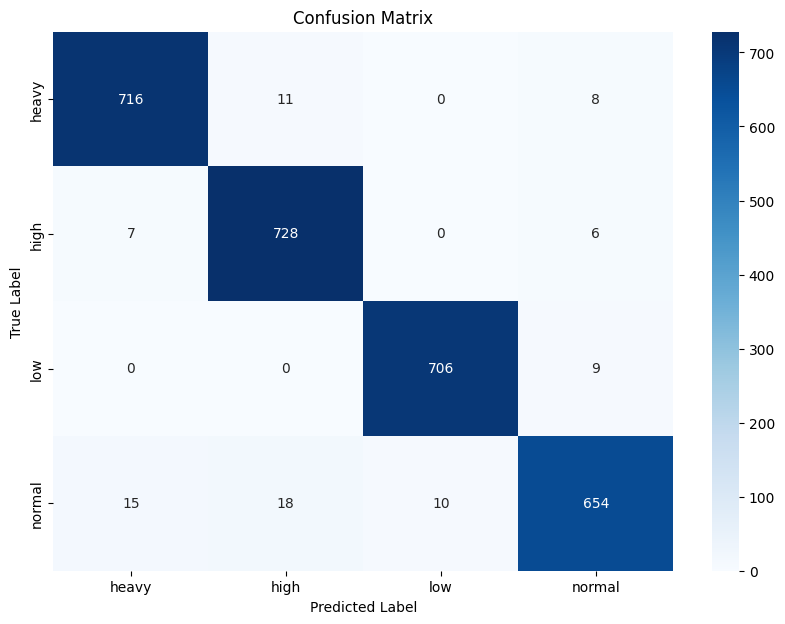

['decision_tree_model.pkl']

In [143]:


# Initialize classifiers
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier()
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', decision_tree),
        ('xgb', xgb)
    ],
    final_estimator=XGBClassifier()
)

# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Save the Decision Tree model
joblib.dump(decision_tree, 'decision_tree_model.pkl')




XGBoost Accuracy: 0.9851108033240997
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       735
           1       0.98      1.00      0.99       741
           2       0.99      0.99      0.99       715
           3       0.98      0.97      0.97       697

    accuracy                           0.99      2888
   macro avg       0.99      0.98      0.98      2888
weighted avg       0.99      0.99      0.99      2888



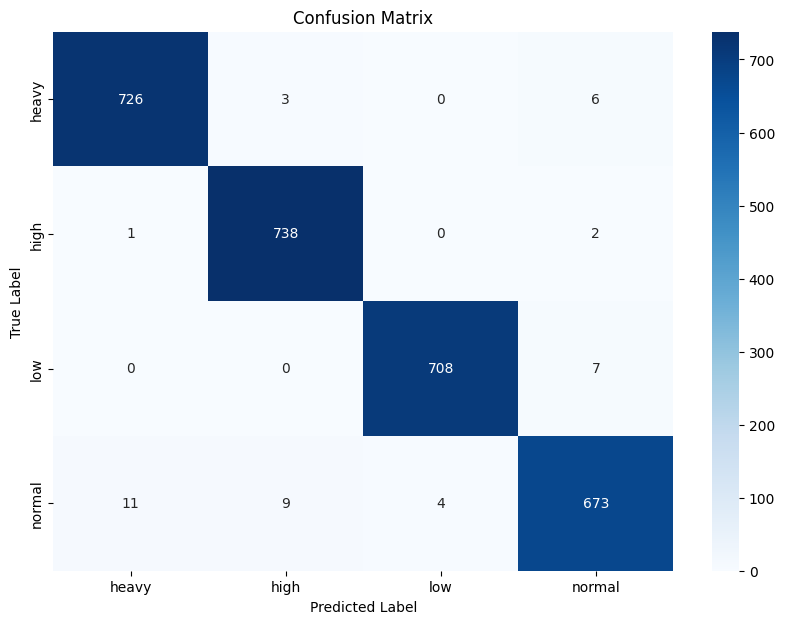

['XGBoost.pkl']

In [144]:
# Train and evaluate XGBoost
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Save the XGBoost Tree model
joblib.dump(decision_tree, 'XGBoost.pkl')


Stacking Classifier Accuracy: 0.9823407202216067
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       735
           1       0.99      0.98      0.99       741
           2       1.00      0.99      0.99       715
           3       0.96      0.97      0.96       697

    accuracy                           0.98      2888
   macro avg       0.98      0.98      0.98      2888
weighted avg       0.98      0.98      0.98      2888



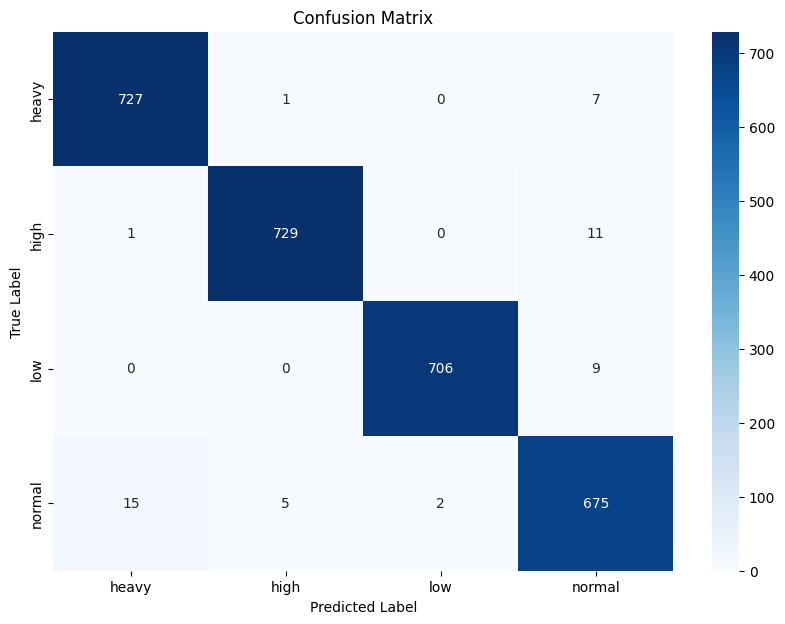

['stacking_classifier_model.pkl']

In [145]:

# Train and evaluate Stacking Classifier
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_stacking)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Save the Stacking Classifier model
joblib.dump(stacking_clf, 'stacking_classifier_model.pkl')

XGBoost Accuracy: 0.9826869806094183
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       735
           1       0.98      0.99      0.99       741
           2       0.99      1.00      0.99       715
           3       0.98      0.96      0.97       697

    accuracy                           0.98      2888
   macro avg       0.98      0.98      0.98      2888
weighted avg       0.98      0.98      0.98      2888



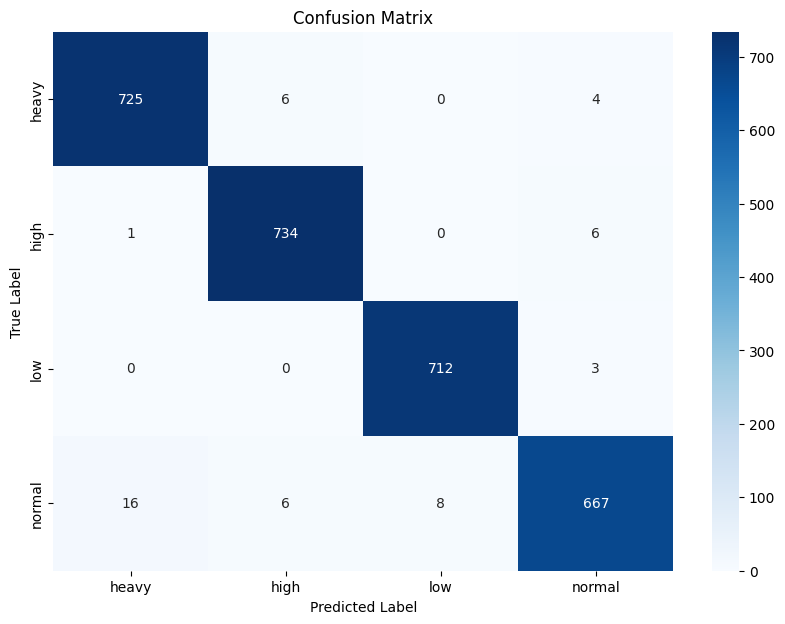

['RandomForest.pkl']

In [146]:
# Train and evaluate RandomForest
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Save the XGBoost Tree model
joblib.dump(decision_tree, 'RandomForest.pkl')


In [149]:
# Save feature names for reference
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']

In [151]:
from datetime import datetime
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Function to convert time to seconds since midnight
def time_to_seconds(time_str):
    try:
        # Parse the time string into a datetime object
        time_obj = datetime.strptime(time_str, '%I:%M:%S %p')
        # Convert time to seconds since midnight
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    except ValueError:
        raise ValueError("Time format should be 'HH:MM:SS AM/PM'")

# Load feature names
feature_names = joblib.load('feature_names.pkl')

# Example input time
input_time_str = '10:00:00 AM'
time_in_seconds = time_to_seconds(input_time_str)

# Example input data
input_data = {
    'Time': [time_in_seconds],
    'CarCount': [10],  # Replace with actual values
    'BikeCount': [5],  # Replace with actual values
    'BusCount': [2],  # Replace with actual values
    'TruckCount': [1],  # Replace with actual values
    'Day of the week': [2]  # Replace with actual values
}

# Create a DataFrame with the correct column order
input_df = pd.DataFrame(input_data)
input_df = input_df.reindex(columns=feature_names)

# Load the trained models
decision_tree = joblib.load('decision_tree_model.pkl')
stacking_clf = joblib.load('stacking_classifier_model.pkl')

# Predict using the Decision Tree model
dt_prediction = decision_tree.predict(input_df)
print("Decision Tree Prediction:", dt_prediction)

# Predict using the Stacking Classifier model
stacking_prediction = stacking_clf.predict(input_df)
print("Stacking Classifier Prediction:", stacking_prediction)


Decision Tree Prediction: [3]
Stacking Classifier Prediction: [0]


C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [171]:
from datetime import datetime
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Function to convert time to seconds since midnight
def time_to_seconds(time_str):
    try:
        # Parse the time string into a datetime object
        time_obj = datetime.strptime(time_str, '%I:%M:%S %p')
        # Convert time to seconds since midnight
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    except ValueError:
        raise ValueError("Time format should be 'HH:MM:SS AM/PM'")

# Load feature names
feature_names = joblib.load('feature_names.pkl')

# Define class names mapping
class_names = {
    0: 'low',
    1: 'high',
    2: 'heavy',
    3: 'normal'
}
# Day of the week encoding:
# {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
# Example input time
input_time_str = '8:45:00 AM'
time_in_seconds = time_to_seconds(input_time_str)

# Example input data
input_data = {
    'Time': [time_in_seconds],
    'CarCount': [140],  # Replace with actual values
    'BikeCount': [14],  # Replace with actual values
    'BusCount': [15],  # Replace with actual values
    'TruckCount': [12],  # Replace with actual values
    'Day of the week': [6]  # Replace with actual values
}

# Create a DataFrame with the correct column order
input_df = pd.DataFrame(input_data)
input_df = input_df.reindex(columns=feature_names)

# Load the trained models
decision_tree = joblib.load('decision_tree_model.pkl')
stacking_clf = joblib.load('stacking_classifier_model.pkl')
xgboost_clf = joblib.load('XGBoost.pkl')
RandomForest_clf = joblib.load('RandomForest.pkl')

# Predict using the Decision Tree model
try:
    dt_prediction = decision_tree.predict(input_df)
    dt_class_name = class_names.get(dt_prediction[0], 'Unknown')
    dt_proba = decision_tree.predict_proba(input_df)
    print("Decision Tree Prediction:", dt_class_name)
    print("Decision Tree Probabilities:", dt_proba)
except Exception as e:
    print("Error with Decision Tree prediction:", e)

# Predict using the Stacking Classifier model
try:
    stacking_prediction = stacking_clf.predict(input_df)
    stacking_class_name = class_names.get(stacking_prediction[0], 'Unknown')
    stacking_proba = stacking_clf.predict_proba(input_df)
    print("Stacking Classifier Prediction:", stacking_class_name)
    print("Stacking Classifier Probabilities:", stacking_proba)
except Exception as e:
    print("Error with Stacking Classifier prediction:", e)

# Predict using the XGBoost Classifier model
try:
    xgboost_prediction = xgboost_clf.predict(input_df)
    xgboost_class_name = class_names.get(xgboost_prediction[0], 'Unknown')
    xgboost_proba = xgboost_clf.predict_proba(input_df)
    print("XGBoost Classifier Prediction:", xgboost_class_name)
    print("XGBoost Classifier Probabilities:", xgboost_proba)
except Exception as e:
    print("Error with XGBoost Classifier prediction:", e)

# Predict using the RandomForest Classifier model
try:
    RandomForest_prediction = RandomForest_clf.predict(input_df)
    RandomForest_class_name = class_names.get(RandomForest_prediction[0], 'Unknown')
    RandomForest_proba = RandomForest_clf.predict_proba(input_df)
    print("RandomForest Classifier Prediction:", RandomForest_class_name)
    print("RandomForest Classifier Probabilities:", RandomForest_proba)
except Exception as e:
    print("Error with RandomForest Classifier prediction:", e)


Decision Tree Prediction: normal
Decision Tree Probabilities: [[0. 0. 0. 1.]]
Stacking Classifier Prediction: low
Stacking Classifier Probabilities: [[9.9893028e-01 8.4857738e-06 1.0042883e-05 1.0511952e-03]]
XGBoost Classifier Prediction: normal
XGBoost Classifier Probabilities: [[0. 0. 0. 1.]]
RandomForest Classifier Prediction: normal
RandomForest Classifier Probabilities: [[0. 0. 0. 1.]]


C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\0871\AppData\Roaming\Pytho

# Hyperparameter tunning

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Stacking Classifier Accuracy: 0.9847645429362881
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       735
           1       0.99      0.99      0.99       741
           2       0.99      0.99      0.99       715
           3       0.97      0.97      0.97       697

    accuracy                           0.98      2888
   macro avg       0.98      0.98      0.98      2888
weighted avg       0.98      0.98      0.98      2888



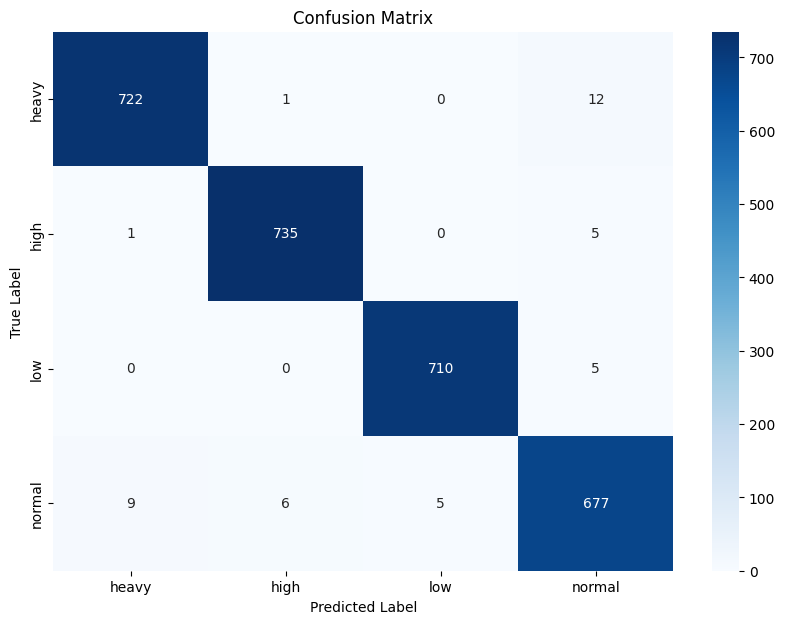

In [184]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Define parameter grids
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize classifiers
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search_dt.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Print best parameters
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best parameters for XGBClassifier:", grid_search_xgb.best_params_)

# Initialize stacking classifier with tuned models
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', grid_search_dt.best_estimator_),
        ('xgb', grid_search_xgb.best_estimator_)
    ],
    final_estimator=XGBClassifier()
)

# Train and evaluate stacking classifier
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()


